In [1]:
def print_num(a,b,c):
    print(a)
    print(b)
    print(c)

In [2]:
# 언패킹 사용하기
x = [10,20,30]
print_num(*x)

10
20
30


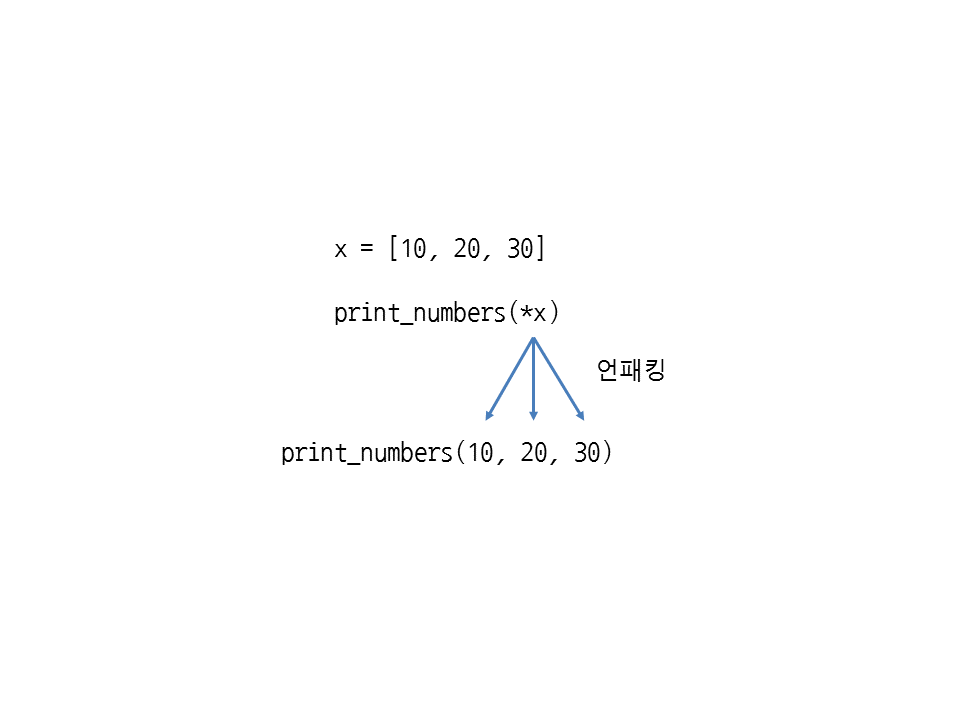

In [4]:
def  print_nums(*args):
    for arg in args:
        print(arg)
nums = [10,20,30,40,50]
print_nums(*nums)

10
20
30
40
50


In [5]:
def personal_info(name, age, address):
    print('이름: ', name)
    print('나이: ', age)
    print('주소: ', address)

personal_info('홍길동', 30, '서울시 용산구 이촌동')

이름:  홍길동
나이:  30
주소:  서울시 용산구 이촌동


In [11]:
x = {'name': '홍길동', 'age': 30, 'address': '서울시 용산구 이촌동'}
personal_info(**x)

이름:  홍길동
나이:  30
주소:  서울시 용산구 이촌동


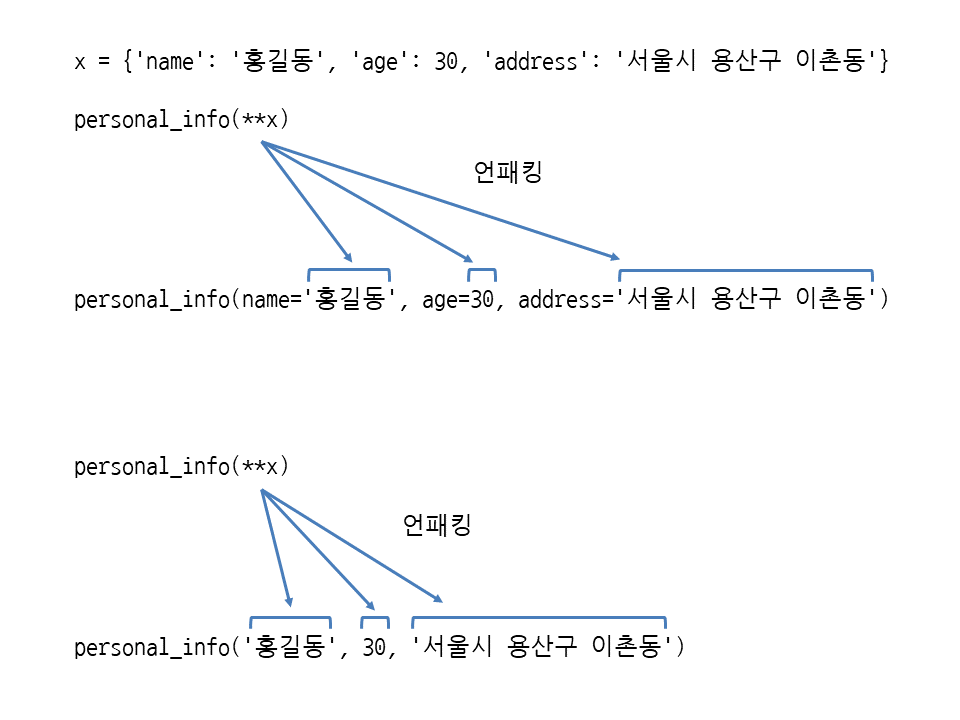

In [4]:
def personal_info(**kwargs):
    for kw, arg in kwargs.items():
        print(kw, ': ', arg, sep='')
        
personal_info(name='홍길동')
print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
personal_info(name='홍길동', age=30, address='서울시 용산구 이촌동')

name: 홍길동
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
name: 홍길동
age: 30
address: 서울시 용산구 이촌동


In [6]:
x = {'name': '홍길동'}
y = {'name': '홍길동', 'age': 30, 'address': '서울시 용산구 이촌동'}
personal_info(**x)
print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
personal_info(**y)


name: 홍길동
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
name: 홍길동
age: 30
address: 서울시 용산구 이촌동


# 예외 처리
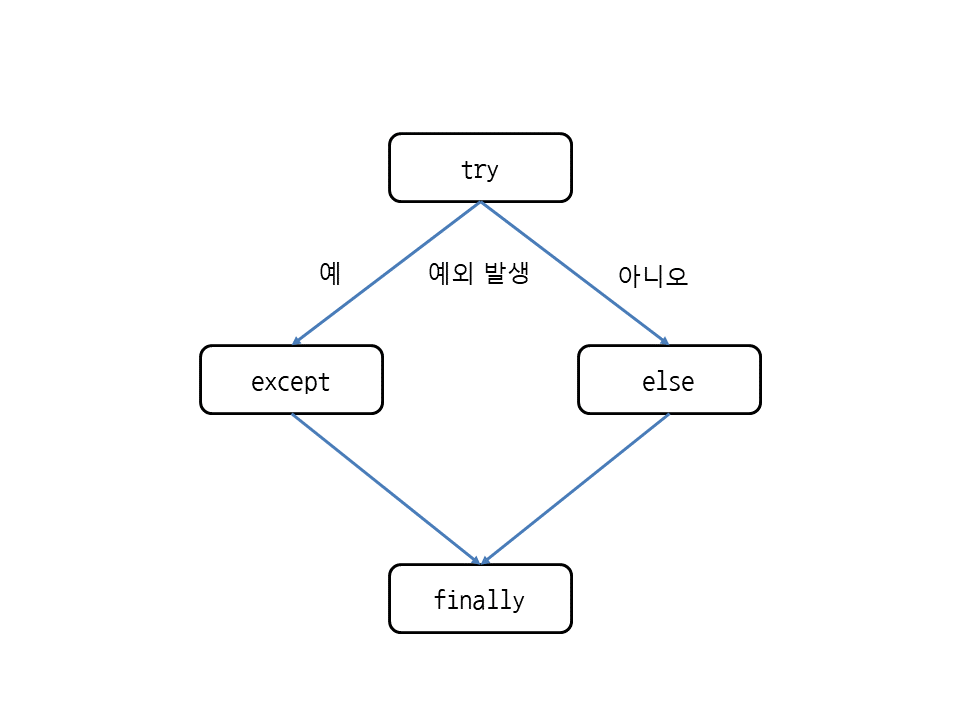

In [8]:
class JSException(Exception):
    def __init__(self):
        super().__init__("Jin Exception")
def main():
    try:
        print("hello")
        raise JSException
    except JSException as e:
        print(e)
main()

hello
Jin Exception


In [10]:
def func1():
    try:
        print('func1')
        raise ZeroDivisionError
    except AttributeError as e:
        print(e)
def func2():
    try:
        print('func2')
        func1()
    except ZeroDivisionError as e:
        print(e)
def main():
    try:
        func2()
    except AttributeError as e:
        print(e)

main()


func2
func1



In [16]:
def trace(func):                             # 호출할 함수를 매개변수로 받음
    def wrapper():                           # 호출할 함수를 감싸는 함수
        print(func.__name__, '함수 시작')    # __name__으로 함수 이름 출력
        func()                               # 매개변수로 받은 함수를 호출
        print(func.__name__, '함수 끝')
    return wrapper                           # wrapper 함수 반환
 
def hello():
    print('hello')
 
def world():
    print('world')
 
trace_hello = trace(hello)    # 데코레이터에 호출할 함수를 넣음
trace_hello()                 # 반환된 함수를 호출
trace_world = trace(world)    # 데코레이터에 호출할 함수를 넣음
trace_world()                 # 반환된 함수를 호출

hello 함수 시작
hello
hello 함수 끝
world 함수 시작
world
world 함수 끝


In [17]:
@trace    # @데코레이터
def hello():
    print('hello')
 
@trace    # @데코레이터
def world():
    print('world')
 
hello()    # 함수를 그대로 호출
world()    # 함수를 그대로 호출

hello 함수 시작
hello
hello 함수 끝
world 함수 시작
world
world 함수 끝


In [14]:
def trace(func):
    def wrapper(a,b):                           # 호출할 함수를 감싸는 함수
        r = func(a,b)
        print(f'a={a}, b={b} -> r={r}')    # __name__으로 함수 이름 출력
        return r                           # wrapper 함수 반환
    return wrapper

@trace
def add(a,b):
    return a+b

print(add(10,20))
    

a=10, b=20 -> r=30
30


In [18]:
def trace(func):                     # 호출할 함수를 매개변수로 받음
    def wrapper(*args, **kwargs):    # 가변 인수 함수로 만듦
        r = func(*args, **kwargs)    # func에 args, kwargs를 언패킹하여 넣어줌
        print('{0}(args={1}, kwargs={2}) -> {3}'.format(func.__name__, args, kwargs, r))
                                     # 매개변수와 반환값 출력
        return r                     # func의 반환값을 반환
    return wrapper                   # wrapper 함수 반환
 
@trace                   # @데코레이터
def get_max(*args):      # 위치 인수를 사용하는 가변 인수 함수
    return max(args)
 
@trace                   # @데코레이터
def get_min(**kwargs):   # 키워드 인수를 사용하는 가변 인수 함수
    return min(kwargs.values())
 
print(get_max(10, 20))
print(get_min(x=10, y=20, z=30))

get_max(args=(10, 20), kwargs={}) -> 20
20
get_min(args=(), kwargs={'x': 10, 'y': 20, 'z': 30}) -> 10
10


In [19]:
def is_multiple(x):              # 데코레이터가 사용할 매개변수를 지정
    def real_decorator(func):    # 호출할 함수를 매개변수로 받음
        def wrapper(a, b):       # 호출할 함수의 매개변수와 똑같이 지정
            r = func(a, b)       # func를 호출하고 반환값을 변수에 저장
            if r % x == 0:       # func의 반환값이 x의 배수인지 확인
                print('{0}의 반환값은 {1}의 배수입니다.'.format(func.__name__, x))
            else:
                print('{0}의 반환값은 {1}의 배수가 아닙니다.'.format(func.__name__, x))
            return r             # func의 반환값을 반환
        return wrapper           # wrapper 함수 반환
    return real_decorator        # real_decorator 함수 반환
 
@is_multiple(3)     # @데코레이터(인수)
def add(a, b):
    return a + b
 
print(add(10, 20))
print(add(2, 5))

add의 반환값은 3의 배수입니다.
30
add의 반환값은 3의 배수가 아닙니다.
7


In [20]:
def hap(a, b):
    ret = a + b
    print(a, b, ret)     # 함수의 입/출력 확인을 위한 print 구문
    return ret

result = hap(3, 4)

3 4 7


In [28]:
import logging

logging.basicConfig(level=logging.CRITICAL)

def hap(a, b):
    ret = a + b
    logging.debug(f"Debug{ret}")
    #logging.info(f"Info{ret}")
    logging.warning(f"Warning{ret}")
    logging.error(f"Error{ret}")
    logging.critical(f"Critical{ret}")
    logging.info(f"input: {a} {b}, output={ret}")
    return ret

hap(3, 4)

ERROR:root:Error7
CRITICAL:root:Critical7


7